In [51]:
%matplotlib inline

import warnings
import random

import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.datasets.base import get_data_home 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt



In [16]:
TRANING_DATASET_SIZE = 0.8
TEST_DATASET_SIZE = 0.2

In [17]:

#Ignorando os warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Downloading MNIST data')
print(f"Downloading at: {get_data_home()}")
mnist_dataset = fetch_mldata('MNIST original')
print('Downloaded and loaded!')
    

Downloaded and loaded!


In [23]:
data = mnist_dataset.data
target = mnist_dataset.target
#mages = mnist_dataset.images

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=TEST_DATASET_SIZE, random_state=42)

print(f"Training dataset size: {len(data_train)}")
print(f"Test dataset size: {len(target_train)}")


Training dataset size: 56000
Test dataset size: 56000


Showing some data from training set

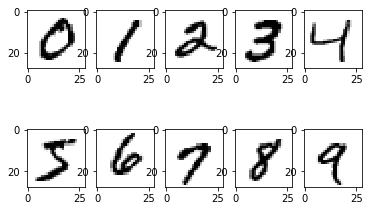

In [31]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(target == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

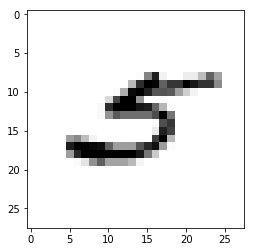

In [46]:
fig, ax = plt.subplots(1)
im_idx = 34567
plottable_image = np.reshape(data[im_idx], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')

In [61]:
for index, value in enumerate(data[im_idx]):
    if index % 28 == 0: print("\n")
    print(f"{value} ", end="")



0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 124 221 13 0 0 18 19 66 154 93 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 70 208 254 248 157 200 200 251 230 203 203 117 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 4 81 244 253 223 169 169 163 96 49 12 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 38 185 254 254 106 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 6 208 254 254 254 233 226 152 73 2 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 6 107 165 143 143 143 143 178 254 138 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 175 200 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,128,64,10), verbose=True, max_iterations=200, alpha=0.0001, tol=1e-4)

print("Fitting model")
mlp_classifier.fit(data_train,target_train)
print("Fitting model ended")

Fitting model
Iteration 1, loss = 1.88263442
Iteration 2, loss = 0.95106517
Iteration 3, loss = 0.58900822
Iteration 4, loss = 0.39582642
Iteration 5, loss = 0.29063651
Iteration 6, loss = 0.22370837
Iteration 7, loss = 0.18948392
Iteration 8, loss = 0.16816385
Iteration 9, loss = 0.15378313
Iteration 10, loss = 0.13937280
Iteration 11, loss = 0.12150013
Iteration 12, loss = 0.11122868
Iteration 13, loss = 0.10104957
Iteration 14, loss = 0.09231261
Iteration 15, loss = 0.09165674
Iteration 16, loss = 0.08105603
Iteration 17, loss = 0.07305931
Iteration 18, loss = 0.07423507
Iteration 19, loss = 0.07722204
Iteration 20, loss = 0.06609329
Iteration 21, loss = 0.05688731
Iteration 22, loss = 0.05706798
Iteration 23, loss = 0.05471189
Iteration 24, loss = 0.04981782
Iteration 25, loss = 0.04649967
Iteration 26, loss = 0.04326323
Iteration 27, loss = 0.04072887
Iteration 28, loss = 0.04229797
Iteration 29, loss = 0.03421135
Iteration 30, loss = 0.03994108
Iteration 31, loss = 0.03746541
Ite

In [65]:
print("Starting predictions")
predictions = mlp_classifier.predict(data_test)
print("Ending predictions")

Starting predictions
Ending predictions


In [66]:
print(confusion_matrix(target_test,predictions))

[[1332    0    4    1    0    2    3    0    2    5]
 [   0 1559    5    4    3    0    3    3    3    1]
 [   6    1 1369   10    4    1    1    4    3    1]
 [   0    0   16 1380    0   21    0    6    8    3]
 [   2    0    1    0 1307    0    2    1    3   12]
 [   3    6    4   19    2 1225   10    1    8    8]
 [  11    2    1    0    2    4 1386    0    1    0]
 [   0    3    9    1    4    2    0 1441    2   14]
 [  12   12    5    7    2   17    5    1 1325    5]
 [   1    3    0   11   12    7    1    6    9 1298]]


In [67]:
print("Training set score: %f" % mlp_classifier.score(data_train, target_train))
print("Test set score: %f" % mlp_classifier.score(data_test, target_test))

Training set score: 0.997821
Test set score: 0.973000


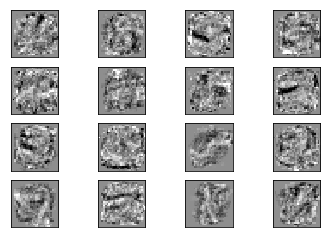

In [71]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights mlp_classifier shown on the same scale
vmin, vmax = mlp_classifier.coefs_[0].min(), mlp_classifier.coefs_[0].max()
for coef, ax in zip(mlp_classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()